In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import sklearn
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection
import sklearn.preprocessing as preprocessing
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("F:\Research\Breast_Cancer_Detection\Dataset\data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.shape

(569, 33)

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [11]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
df.select_dtypes(include=['object']).columns

Index(['diagnosis'], dtype='object')

In [16]:

df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

In [19]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Visualization

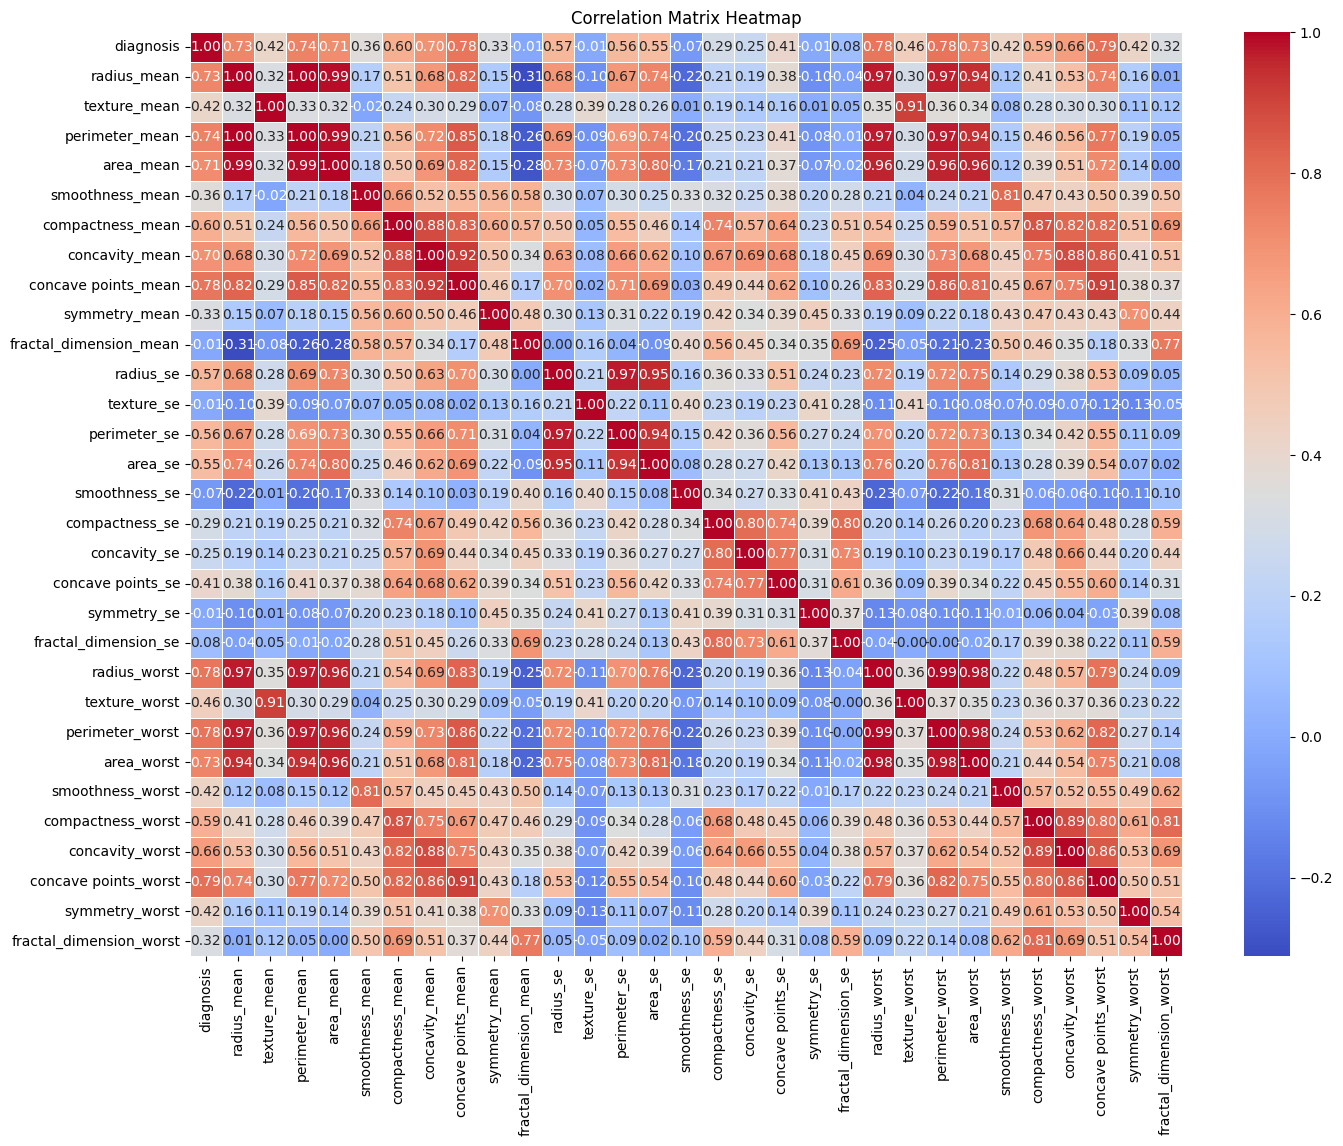

In [22]:
plt.figure(figsize=(16, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

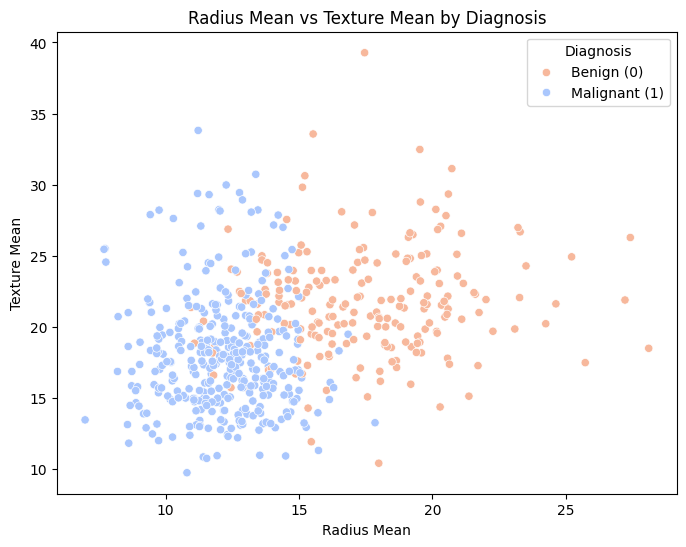

In [23]:
# Example: Scatter plot between two important features colored by diagnosis

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='radius_mean',
    y='texture_mean',
    hue='diagnosis',
    palette='coolwarm'
)
plt.title('Radius Mean vs Texture Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Diagnosis', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

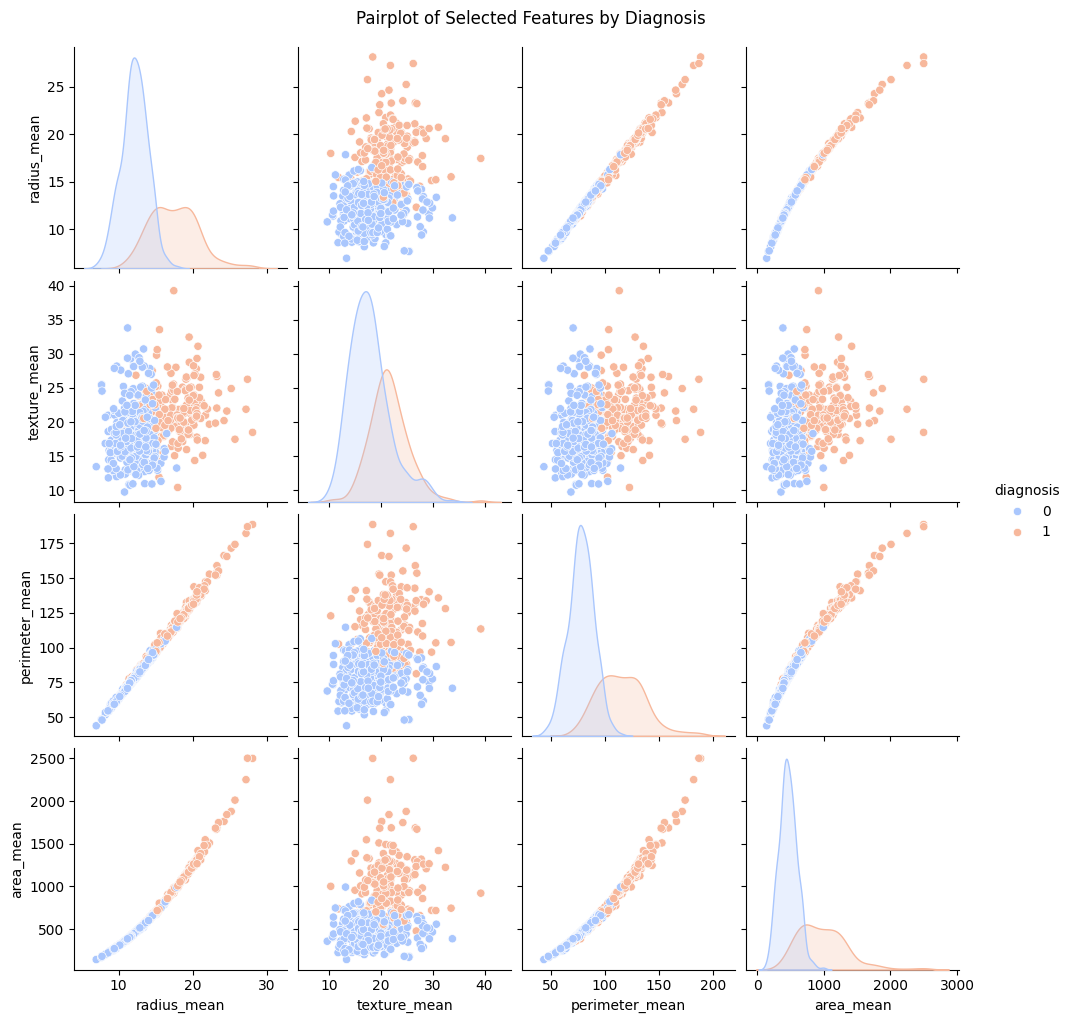

In [25]:
# 1. Pairplot for selected features
sns.pairplot(df, vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'], hue='diagnosis', palette='coolwarm')
plt.suptitle('Pairplot of Selected Features by Diagnosis', y=1.02)
plt.show()


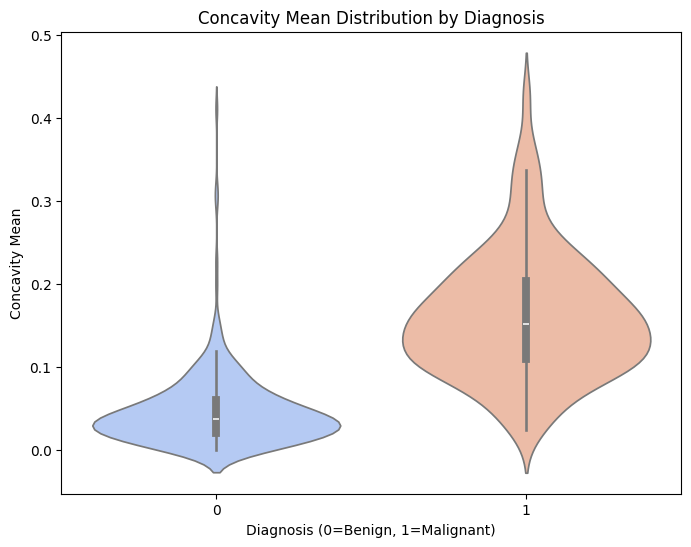

In [26]:
# 3. Violin plot for another feature
plt.figure(figsize=(8, 6))
sns.violinplot(x='diagnosis', y='concavity_mean', data=df, palette='coolwarm')
plt.title('Concavity Mean Distribution by Diagnosis')
plt.xlabel('Diagnosis (0=Benign, 1=Malignant)')
plt.ylabel('Concavity Mean')
plt.show()



Text(0.5, 36.72222222222221, 'Diagnosis (0=Benign, 1=Malignant)')

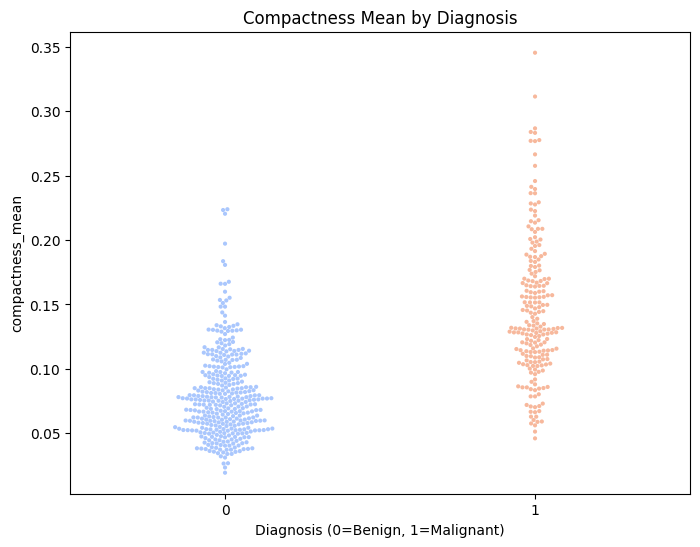

In [27]:
# 4. Swarmplot for a feature
plt.figure(figsize=(8, 6))
sns.swarmplot(x='diagnosis', y='compactness_mean', data=df, palette='coolwarm', size=3)
plt.title('Compactness Mean by Diagnosis')
plt.xlabel('Diagnosis (0=Benign, 1=Malignant)')

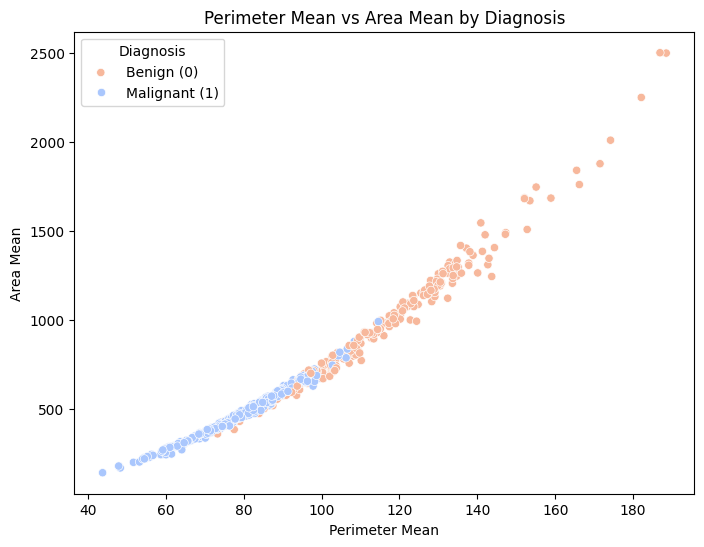

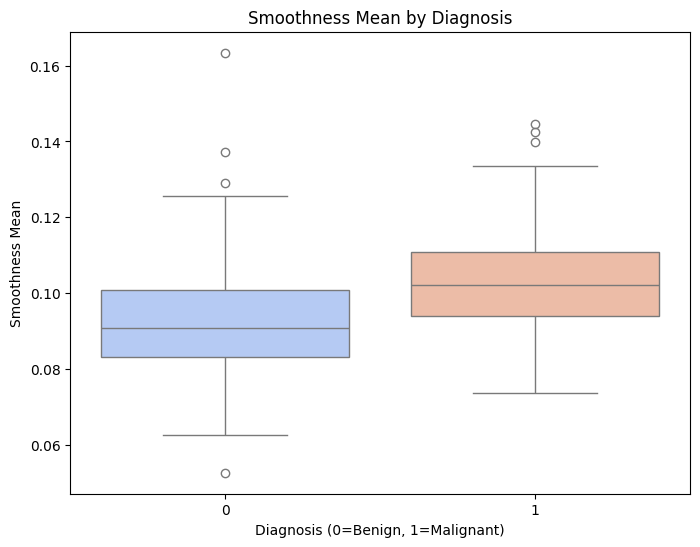

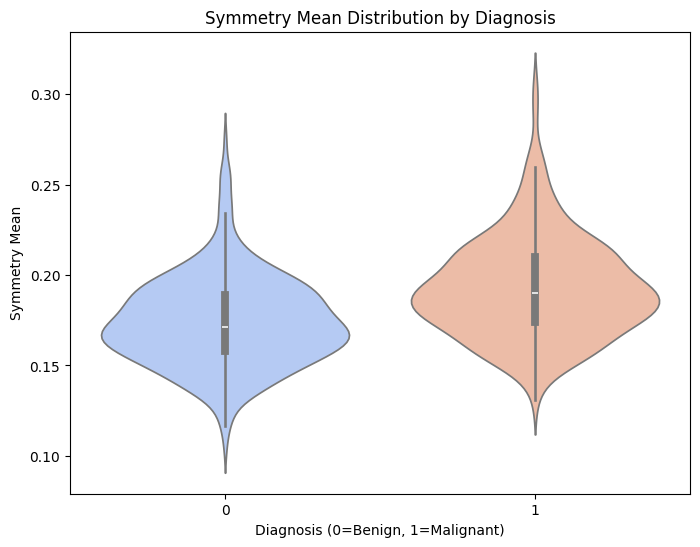

Text(53.972222222222214, 0.5, 'Fractal Dimension Mean')

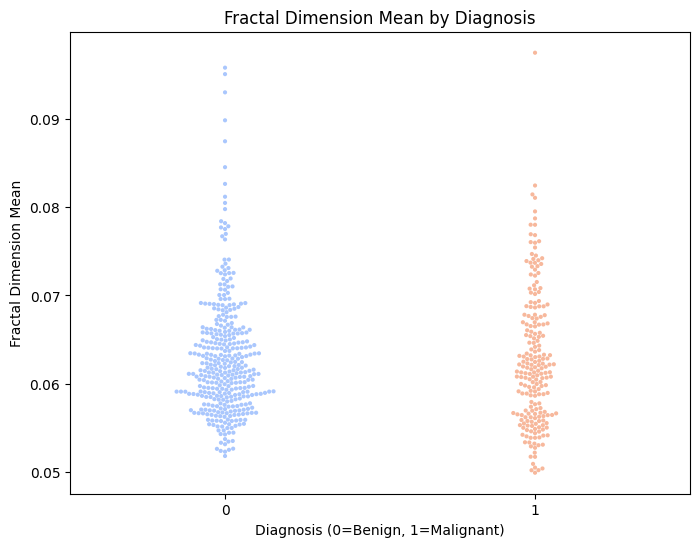

In [28]:
# 1. Scatter plot: perimeter_mean vs area_mean
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='perimeter_mean', y='area_mean', hue='diagnosis', palette='coolwarm')
plt.title('Perimeter Mean vs Area Mean by Diagnosis')
plt.xlabel('Perimeter Mean')
plt.ylabel('Area Mean')
plt.legend(title='Diagnosis', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

# 2. Boxplot: smoothness_mean by diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='smoothness_mean', data=df, palette='coolwarm')
plt.title('Smoothness Mean by Diagnosis')
plt.xlabel('Diagnosis (0=Benign, 1=Malignant)')
plt.ylabel('Smoothness Mean')
plt.show()

# 3. Violin plot: symmetry_mean by diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(x='diagnosis', y='symmetry_mean', data=df, palette='coolwarm')
plt.title('Symmetry Mean Distribution by Diagnosis')
plt.xlabel('Diagnosis (0=Benign, 1=Malignant)')
plt.ylabel('Symmetry Mean')
plt.show()

# 4. Swarmplot: fractal_dimension_mean by diagnosis
plt.figure(figsize=(8, 6))
sns.swarmplot(x='diagnosis', y='fractal_dimension_mean', data=df, palette='coolwarm', size=3)
plt.title('Fractal Dimension Mean by Diagnosis')
plt.xlabel('Diagnosis (0=Benign, 1=Malignant)')
plt.ylabel('Fractal Dimension Mean')

## Outlier Treatement

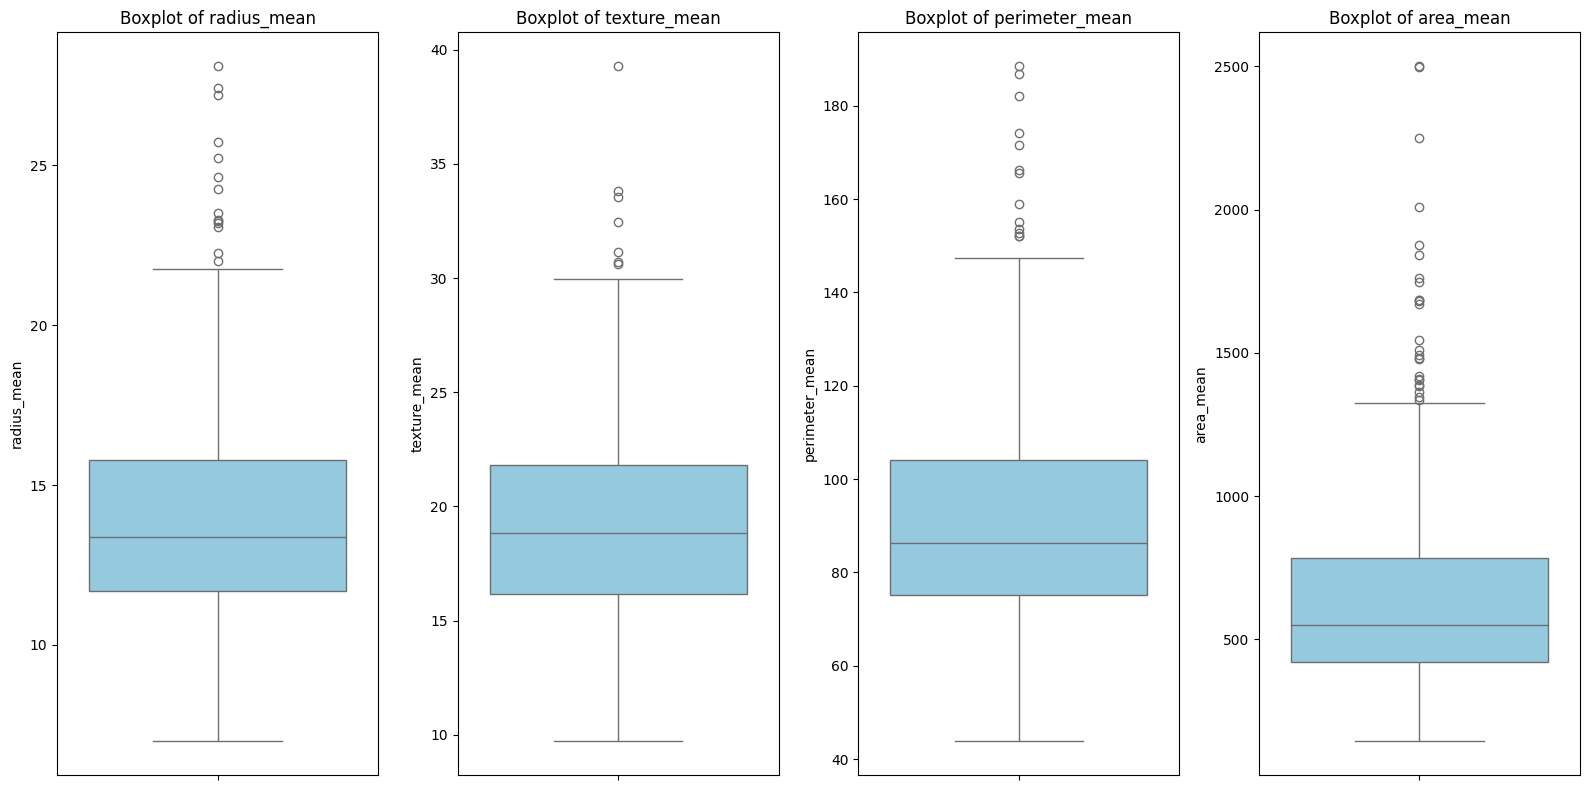

Number of outliers in 'radius_mean': 14


In [30]:
# Outlier detection using boxplots for selected features
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
plt.figure(figsize=(16, 8))
for i, feature in enumerate(features):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# To get outlier values for a specific feature (e.g., 'radius_mean') using IQR:
Q1 = df['radius_mean'].quantile(0.25)
Q3 = df['radius_mean'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['radius_mean'] < Q1 - 1.5 * IQR) | (df['radius_mean'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers in 'radius_mean': {outliers.shape[0]}")

In [31]:
# Outlier treatment using IQR method for selected features
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the outliers
    df[feature] = np.where(df[feature] < lower_bound, lower_bound,
                           np.where(df[feature] > upper_bound, upper_bound, df[feature]))

# Check if outliers are capped
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < Q1 - 1.5 * IQR) | (df[feature] > Q3 + 1.5 * IQR)]
    print(f"Number of outliers in '{feature}' after capping: {outliers.shape[0]}")

Number of outliers in 'radius_mean' after capping: 0
Number of outliers in 'texture_mean' after capping: 0
Number of outliers in 'perimeter_mean' after capping: 0
Number of outliers in 'area_mean' after capping: 0


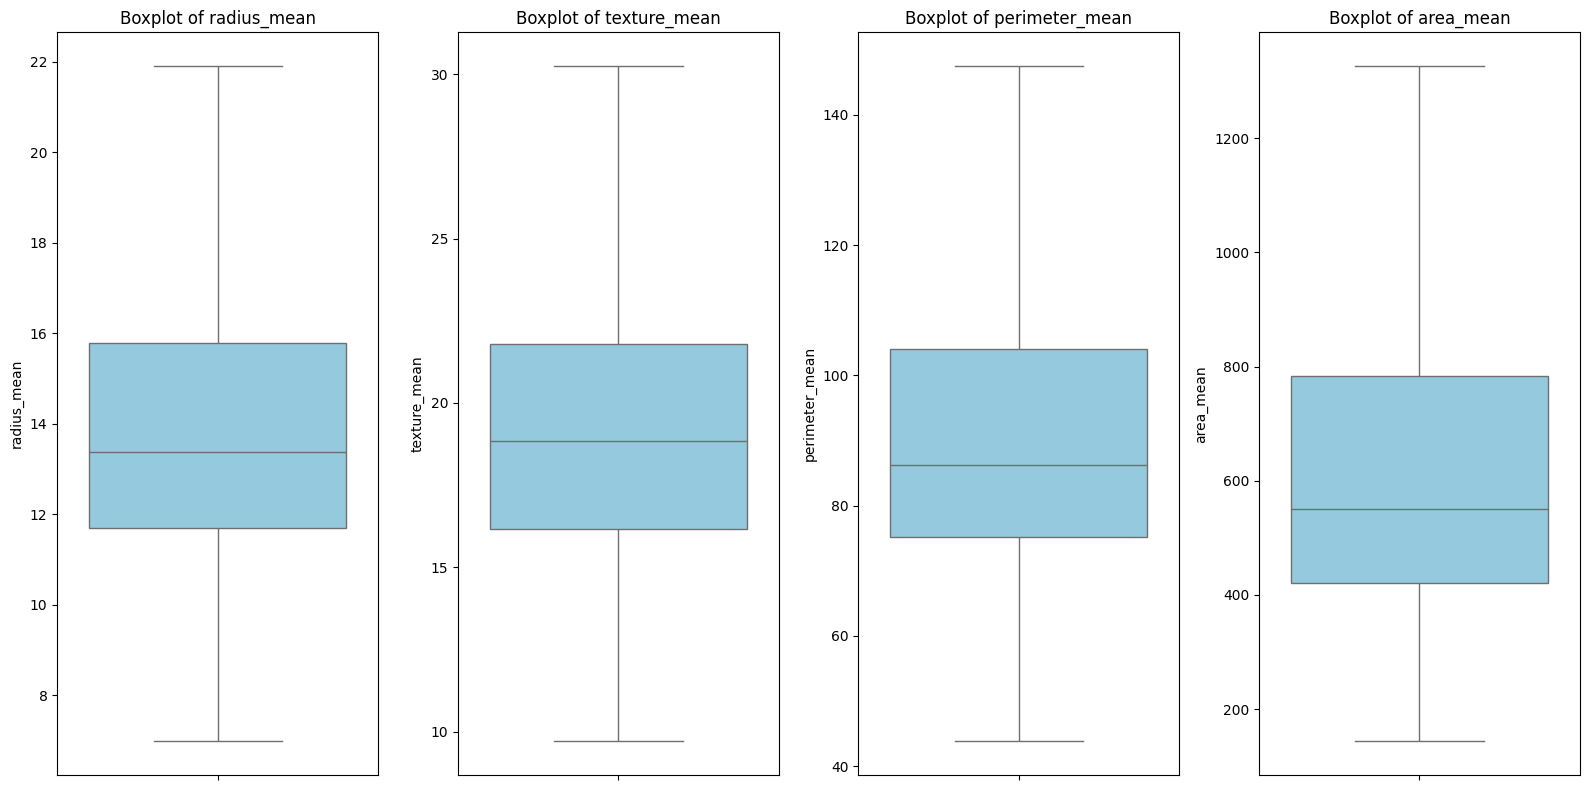

Number of outliers in 'radius_mean': 0


In [32]:
# Outlier detection using boxplots for selected features
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
plt.figure(figsize=(16, 8))
for i, feature in enumerate(features):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# To get outlier values for a specific feature (e.g., 'radius_mean') using IQR:
Q1 = df['radius_mean'].quantile(0.25)
Q3 = df['radius_mean'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['radius_mean'] < Q1 - 1.5 * IQR) | (df['radius_mean'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers in 'radius_mean': {outliers.shape[0]}")

## Normalization

In [33]:
# Normalize all features except the target column 'diagnosis'
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
feature_cols = df.columns[df.columns != 'diagnosis']

In [34]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Train Test Split

In [35]:
# Train Test Split
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)

Train shape: (455, 30)


In [37]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
# Predict on test set
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[72  0]
 [ 3 39]]


In [39]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [40]:
# Predict on test set
y_pred = lr.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix:
 [[71  1]
 [ 5 37]]


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [43]:
# Predict on test set
y_pred = knn.predict(X_test)

#Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9122807017543859

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.93        72
           1       0.97      0.79      0.87        42

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114


Confusion Matrix:
 [[71  1]
 [ 9 33]]


In [44]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Initialize the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [45]:
# Predict on test set
y_pred = dt.predict(X_test)

#Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9298245614035088

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Confusion Matrix:
 [[68  4]
 [ 4 38]]


In [46]:
# Ensemble of Random Forest, Logistic Regression, KNN, and Decision Tree using VotingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Define base models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42)

# Create the ensemble model
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('lr', lr),
        ('knn', knn),
        ('dt', dt)
    ],
    voting='hard'  # or 'soft' for probability-based voting if all models support predict_proba
)

# Train the ensemble
ensemble.fit(X_train, y_train)

# Predict and evaluate
y_pred = ensemble.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Ensemble Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
 [[72  0]
 [ 5 37]]


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9626373626373628


In [48]:
# Fit the Random Forest model with best parameters from GridSearchCV
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# Evaluation
print("Best RF Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best RF Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[72  0]
 [ 3 39]]


In [56]:
# XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict on test set
y_pred = xgb.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

XGBoost Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[72  0]
 [ 3 39]]


In [57]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=500, random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)


Stacking Model Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



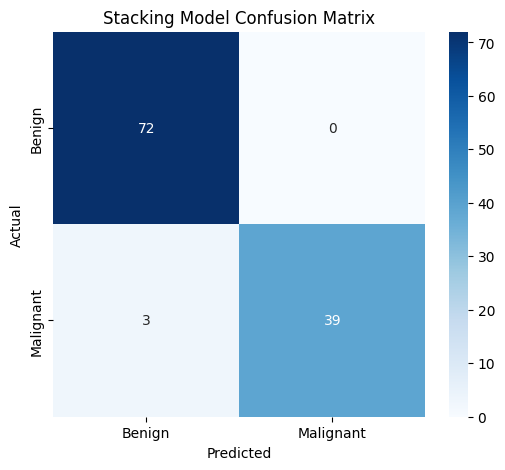

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred_stack)
print("Stacking Model Accuracy:", accuracy)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack, target_names=['Benign', 'Malignant']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Stacking Model Confusion Matrix')
plt.show()


Stacking Model Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



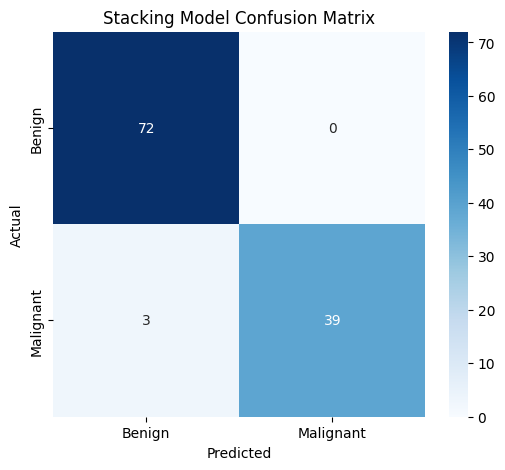

In [60]:
# Stacking Classifier with all used models: Random Forest, Logistic Regression, KNN, Decision Tree, XGBoost
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Define base estimators
estimators = [
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('xgb', XGBClassifier(n_estimators=500, random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

# Stacking model (meta-learner: Logistic Regression)
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

# Fit stacking model
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)

# Evaluation
print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack, target_names=['Benign', 'Malignant']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Stacking Model Confusion Matrix')
plt.show()

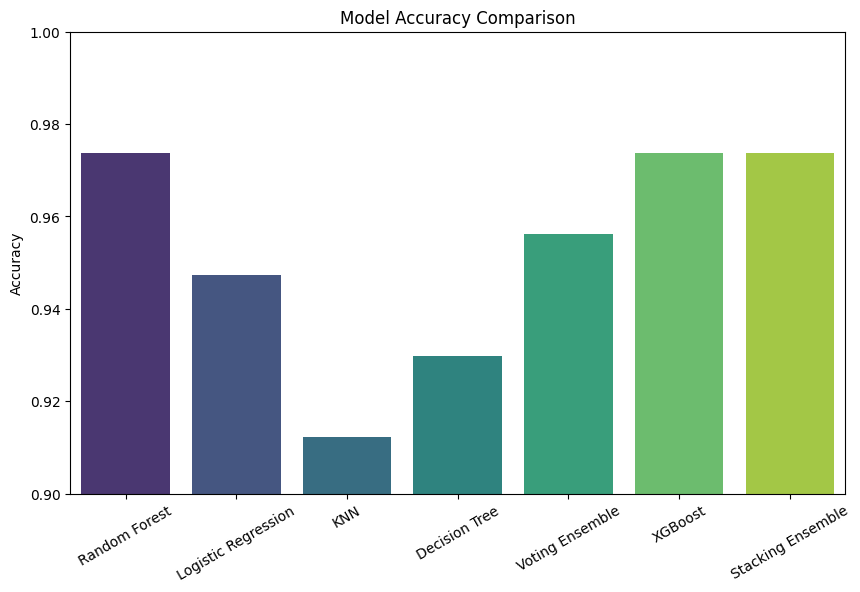

In [62]:
# Make sure all models are fitted before comparison

# Fit Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Fit Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Fit KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Fit Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Fit Voting Ensemble
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('lr', lr),
        ('knn', knn),
        ('dt', dt)
    ],
    voting='hard'
)
ensemble.fit(X_train, y_train)

# XGBoost and stack_model should already be fitted above

# Now plot the comparison
model_names = [
    "Random Forest",
    "Logistic Regression",
    "KNN",
    "Decision Tree",
    "Voting Ensemble",
    "XGBoost",
    "Stacking Ensemble"
]

accuracies = [
    accuracy_score(y_test, rf.predict(X_test)),
    accuracy_score(y_test, lr.predict(X_test)),
    accuracy_score(y_test, knn.predict(X_test)),
    accuracy_score(y_test, dt.predict(X_test)),
    accuracy_score(y_test, ensemble.predict(X_test)),
    accuracy_score(y_test, xgb.predict(X_test)),
    accuracy_score(y_test, stack_model.predict(X_test))
]

plt.figure(figsize=(10,6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.ylim(0.9, 1.0)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()